In [ ]:
from sympy import *
import plotly.graph_objects as go
import numpy as np
init_printing()
x, y, z, t = symbols('x y z t')
theta, phi = symbols('theta phi')

# ***Consider a ball of mass $m$ constrained to move as shown in figure. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk. The orthonormal frame $\mathbf{c}$ is fixed to the disk. The disk is rotating about a vertical axis (that is about the $\mathbf{e}_3$ axis) and about an axis through its centre that is perpendicular to the disk (that is about the $\mathbf{c}_1$ axis). Write down the equations of motion of the mass and simulate its motion for various different initial conditions.***

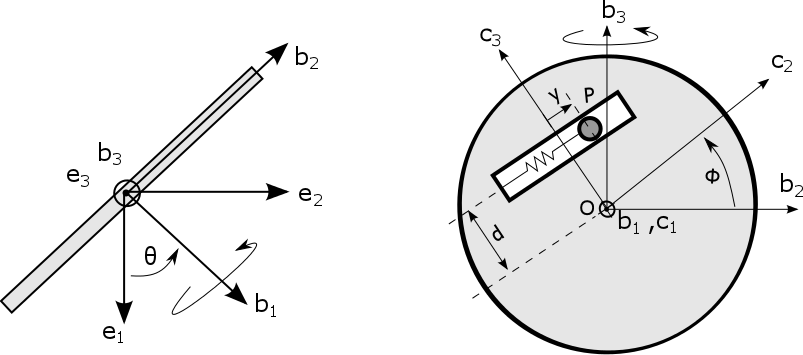

Cosidering rotations,

\begin{align}
b&=eR_3(\theta)\\
c&=bR_1(\phi)\\
c=bR_1(\phi)&=eR_3(\theta)R_1(\phi)
\end{align}

So the rotation matrix can be written as,

\begin{align}
R&=   \begin{bmatrix}
  cos\theta&-sin\theta&0\\
  sin\theta&-cos\theta&0\\
  0&0&1
  \end{bmatrix}
    \begin{bmatrix}
  1&0&0\\
  0&cos\phi&sin\phi\\
  0&-sin\phi&cos\phi
  \end{bmatrix}
\end{align}

In [ ]:
R3=Matrix([[cos(theta),-sin(theta),0],[sin(theta),-cos(theta),0],[0,0,1]])
R1=Matrix([[1,0,0],[0,cos(phi),sin(phi)],[0,-sin(phi),cos(phi)]])

R=R3*R1

print(latex(R))
print(latex(R.T))

\left[\begin{matrix}\cos{\left(\theta \right)} & - \sin{\left(\theta \right)} \cos{\left(\phi \right)} & - \sin{\left(\phi \right)} \sin{\left(\theta \right)}\\\sin{\left(\theta \right)} & - \cos{\left(\phi \right)} \cos{\left(\theta \right)} & - \sin{\left(\phi \right)} \cos{\left(\theta \right)}\\0 & - \sin{\left(\phi \right)} & \cos{\left(\phi \right)}\end{matrix}\right]
\left[\begin{matrix}\cos{\left(\theta \right)} & \sin{\left(\theta \right)} & 0\\- \sin{\left(\theta \right)} \cos{\left(\phi \right)} & - \cos{\left(\phi \right)} \cos{\left(\theta \right)} & - \sin{\left(\phi \right)}\\- \sin{\left(\phi \right)} \sin{\left(\theta \right)} & - \sin{\left(\phi \right)} \cos{\left(\theta \right)} & \cos{\left(\phi \right)}\end{matrix}\right]


\begin{align}
R=\left[\begin{matrix}\cos{\left(\theta \right)} & - \sin{\left(\theta \right)} \cos{\left(\phi \right)} & - \sin{\left(\phi \right)} \sin{\left(\theta \right)}\\\sin{\left(\theta \right)} & - \cos{\left(\phi \right)} \cos{\left(\theta \right)} & - \sin{\left(\phi \right)} \cos{\left(\theta \right)}\\0 & - \sin{\left(\phi \right)} & \cos{\left(\phi \right)}\end{matrix}\right]
\end{align}


Position in c frame,

\begin{align}
X=\begin{bmatrix}
0\\
y\\
d\\
\end{bmatrix}
\end{align}

And,

\begin{align}
\dot{d}=0
\end{align}

Position in e frame,

\begin{align}
x=RX
\end{align}


Force in e frame,

\begin{align}
f=m\ddot{x}
\end{align}

Force in b frame,

\begin{align}
F&=R^Tf\\
F&=m\widehat{\Omega}^2X+2m\widehat{\Omega}\dot{X}+m\dot{\widehat{\Omega}}X+m\ddot{X}
\end{align}

$%$

For ${\Omega}$,






\begin{align}
\Omega&=R_1^T(\phi)\Omega_3 + \Omega_1\\
&= \begin{bmatrix}
\dot{\phi}\\
\dot{\theta}sin\phi\\
\dot{\theta}cos\phi
\end{bmatrix}\\
\dot{\Omega}&=\begin{bmatrix}
\ddot{\phi}\\
\ddot{\theta}sin\phi+\dot{\theta}\dot{\phi}cos\phi\\
\ddot{\theta}cos\phi+\dot{\theta}\dot{\phi}sin\phi
\end{bmatrix}\\
\end{align}

By $\Omega$,

\begin{align}
\widehat{\Omega}&=\begin{bmatrix}
0& -\dot{\theta}cos\phi & \dot{\theta}sin\phi\\
\dot{\theta}cos\phi & 0 & -\dot{\phi}\\
-\dot{\theta}sin\phi & \dot{\phi} & 0
\end{bmatrix}\\
\dot{\widehat{\Omega}}&= \begin{bmatrix}
0 & -(\ddot{\theta}\cos\phi-\dot{\theta}\dot{\phi}\sin\phi) & (\ddot{\theta}\sin\phi+\dot{\theta}\dot{\phi}\cos\phi) \\ 
(\ddot{\theta}\cos\phi-\dot{\theta}\dot{\phi}\sin\phi) &0 &-\ddot{\phi} \\
-(\ddot{\theta}\sin\phi+\dot{\theta}\dot{\phi}\cos\phi) &\ddot{\phi} &0
\end{bmatrix}
\end{align}

since,


\begin{align}
\widehat{\Omega}^2&=\Omega\Omega^T-||\Omega||^2I\\
\widehat{\Omega}^2 &=
\left[\begin{array}{ccc}  - {\dot{\theta}}^2 & \dot{\phi}\, \dot{\theta}\, \sin\phi & \dot{\phi}\, \dot{\theta}\, \cos\phi\\ \dot{\phi}\, \dot{\theta}\, \sin\phi &  - {\dot{\phi}}^2 - {\dot{\theta}}^2\, {\cos\phi}^2 & {\dot{\theta}}^2\, \cos\phi\, \sin\phi\\ \dot{\phi}\, \dot{\theta}\, \cos\phi & {\dot{\theta}}^2\, \cos\phi\, \sin\phi &  - {\dot{\phi}}^2 - {\dot{\theta}}^2\, {\sin\phi}^2 \end{array}\right]
\end{align}

So the Force in c Frame can be written as,

\begin{align}
F&=m\widehat{\Omega}^2X+2m\widehat{\Omega}\dot{X}+m\dot{\widehat{\Omega}}X+m\ddot{X}\\
\frac{F}{m}=\begin{bmatrix}
y\dot{\theta}\dot{\phi}sin\phi+d\dot{\theta}\dot{\phi}cos\phi\\
-y(\dot{\phi}^2+\dot{\theta}^2cos^2 \phi) + d \dot{\theta}^2cos\phi sin\phi\\
y\dot{\theta}^2cos\phi sin\phi - d(\dot{\phi}^2-\dot{\theta}^2sin^2 \phi)
\end{bmatrix}
&+ \begin{bmatrix}
-2\dot{y}\dot{\theta}cos\phi\\
0\\
0\\
\end{bmatrix}
+\begin{bmatrix}
-y(\ddot{\theta}-\dot{\theta}\dot{\phi}sin\phi)+d(\ddot{\theta}sin\phi + \dot{\theta}\dot{\phi}cos\phi)\\
-d\ddot{\phi}\\
y\ddot{\phi}
\end{bmatrix}
+\begin{bmatrix}
0\\
\ddot{y}\\
0
\end{bmatrix}
\end{align}

\begin{align}
F= m\begin{bmatrix}
2y\dot{\theta}\dot{\phi}sin\phi+2d\dot{\theta}\dot{\phi}cos\phi-2\dot{y}\dot{\theta}cos\phi-y\ddot{\theta}\\
-y(\dot{\phi}^2+\dot{\theta}^2cos^2 \phi) + d \dot{\theta}^2cos\phi sin\phi-d\ddot{\phi}+\ddot{y}\\
y\dot{\theta}^2cos\phi sin\phi - d(\dot{\phi}^2-\dot{\theta}^2sin^2 \phi) + y\ddot{\phi}
\end{bmatrix}
\end{align}

Force in c Frame can also be written as,

\begin{align}
F=\begin{bmatrix}
F_{N1}\\
Ky-mgsin\phi\\
-mgcos\phi
\end{bmatrix}
&=m\begin{bmatrix}
2y\dot{\theta}\dot{\phi}sin\phi+2d\dot{\theta}\dot{\phi}cos\phi-2\dot{y}\dot{\theta}cos\phi-y\ddot{\theta}\\
-y(\dot{\phi}^2+\dot{\theta}^2cos^2 \phi) + d \dot{\theta}^2cos\phi sin\phi-d\ddot{\phi}+\ddot{y}\\
y\dot{\theta}^2cos\phi sin\phi - d(\dot{\phi}^2-\dot{\theta}^2sin^2 \phi) + y\ddot{\phi}
\end{bmatrix}\\
\frac{K}{m}y&=-y(\dot{\phi}^2+\dot{\theta}^2cos^2 \phi) + d \dot{\theta}^2cos\phi sin\phi-d\ddot{\phi}+\ddot{y}+gsin\phi\\
d\ddot{\phi}&=\ddot{y}+d \dot{\theta}^2cos\phi sin\phi-y(\dot{\phi}^2+\dot{\theta}^2cos^2 \phi-\frac{K}{m})+gsin\phi
\end{align}

sice $\ddot{\phi}= 0$,

\begin{align}
\ddot{y}=y(\dot{\phi}^2+\dot{\theta}^2cos^2 \phi-\frac{K}{m})-d \dot{\theta}^2cos\phi sin\phi-gsin\phi
\end{align}


In [ ]:
def string_on_hoop(X,t, parameters):
  g=9.806;
  dtheta=parameters[0];
  dphi=parameters[0];
  phi=dphi*t
  y=X[0];
  dy=X[1];
  ddy=y*(dphi**2 + (dtheta**2)*((np.cos(phi))**2) -10)-(dtheta**2)*(np.cos(phi))*(np.sin(phi))-g*sin(phi);
  return [dy, ddy]

In [ ]:
from scipy.integrate import odeint

In [64]:
omega=1;

t = np.linspace(0, 50, int(50/0.01+1))
sol = odeint(string_on_hoop,[np.pi/3,0], t, args=([omega],));
soln=sol;
fig = go.Figure()
[nt,nS]=sol.shape;
for nn in range(nS):
            fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name=""))
            fig.update_layout(title="Bead on a hoop part 2", xaxis=dict(title="Time"),yaxis=dict(title="$y,\dot{y}$"))
        
fig.show()

In [ ]:
p = [0,0.1]

t = np.linspace(0,10,1500)
yT = odeint(string_on_hoop,[np.pi/3,0], t, args=([omega],));

In [ ]:
xx=[]; yy=[]; zz=[]; XX=[];
for ii,tt in enumerate(t):
  omegat=omega*tt;
  phit=sol[ii][1]
  R3theta=np.array([[np.cos(omegat), -np.sin(omegat), 0],[np.sin(omegat), np.cos(omegat),0],[0,0,1]]);
  R1phi=np.array([[1,0,0],[0, np.cos(phit), -np.sin(phit)],[0,np.sin(phit), np.cos(phit)]]);
  R=R3theta @ R1phi;
  temp=R @ np.array([0,yT[ii,0],1]);
  XX+=[[jj for jj in temp]];

print(len(XX))

dxx=[]
dyy=[]
dzz=[]
dxx2=[]
dyy2=[]
dzz2=[]

for ik in range(1500):
  dxx.append(XX[ik][0])
  dyy.append(XX[ik][1])
  dzz.append(XX[ik][2])

for ikk in range(500):
  dxx2.append(XX[3*ikk][0])
  dyy2.append(XX[3*ikk][1])
  dzz2.append(XX[3*ikk][2])

1500


In [ ]:
fig2=go.Figure(
    data=[go.Scatter3d(x=dxx,y=dyy,z=dzz,mode='lines',line=dict(color="red", width=2)),
          go.Scatter3d(x=dxx,y=dyy,z=dzz,mode='lines',line=dict(color="red", width=2))
          ],
    layout=go.Layout(
        scene = dict(
                            xaxis=dict(range=[-3,3], autorange=False),
                            yaxis=dict(range=[-3,3], autorange=False),
                            zaxis=dict(range=[-3,3], autorange=False),
                            aspectratio=dict(x=1, y=1, z=1),
                ),
                title_text="Bead on a hoop", hovermode="closest",
                updatemenus=[dict(type="buttons",
                                buttons=[dict(label="Play",
                                                method="animate",
                                                args=[None])])]),
            frames=[go.Frame(
                data=[go.Scatter3d(
                    x=[dxx2[p]],
                    y=[dyy2[p]],
                    z=[dzz2[p]],
                    name='Particle',
                    mode="markers",
                    marker=dict(color="blue", size=10))])
            for p in range(500)]
    )


fig2.show()